c:\Users\WangP\anaconda3\envs\comp\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\WangP\anaconda3\envs\comp\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Test: 100%|██████████| 113/113 [00:13<00:00,  8.23batch/s, accuracy=62.8, loss=0.0193]


Epoch [1/15], Train Loss: 1.3176, Train Accuracy: 57.05%, Test Loss: 1.2231, Test Accuracy: 62.76%


Test: 100%|██████████| 113/113 [00:12<00:00,  9.01batch/s, accuracy=65.9, loss=0.0181]


Epoch [2/15], Train Loss: 1.1499, Train Accuracy: 65.73%, Test Loss: 1.1522, Test Accuracy: 65.91%


Test: 100%|██████████| 113/113 [00:12<00:00,  8.72batch/s, accuracy=66.8, loss=0.0178]


Epoch [3/15], Train Loss: 1.0836, Train Accuracy: 69.15%, Test Loss: 1.1310, Test Accuracy: 66.82%


Test: 100%|██████████| 113/113 [00:12<00:00,  9.06batch/s, accuracy=66.6, loss=0.0179]


Epoch [4/15], Train Loss: 1.0248, Train Accuracy: 72.21%, Test Loss: 1.1354, Test Accuracy: 66.61%


Test: 100%|██████████| 113/113 [00:14<00:00,  8.00batch/s, accuracy=68.9, loss=0.0174]


Epoch [5/15], Train Loss: 0.9687, Train Accuracy: 75.34%, Test Loss: 1.1067, Test Accuracy: 68.88%


Test: 100%|██████████| 113/113 [00:13<00:00,  8.56batch/s, accuracy=67.9, loss=0.018] 


Epoch [6/15], Train Loss: 0.9172, Train Accuracy: 78.02%, Test Loss: 1.1434, Test Accuracy: 67.93%


Test: 100%|██████████| 113/113 [00:12<00:00,  8.88batch/s, accuracy=68.5, loss=0.0179]


Epoch [7/15], Train Loss: 0.8680, Train Accuracy: 80.56%, Test Loss: 1.1344, Test Accuracy: 68.50%


Test: 100%|██████████| 113/113 [00:13<00:00,  8.67batch/s, accuracy=71.3, loss=0.0174]


Epoch [8/15], Train Loss: 0.7449, Train Accuracy: 87.09%, Test Loss: 1.1062, Test Accuracy: 71.26%


Test: 100%|██████████| 113/113 [00:13<00:00,  8.54batch/s, accuracy=71.2, loss=0.0176]


Epoch [9/15], Train Loss: 0.6938, Train Accuracy: 89.54%, Test Loss: 1.1170, Test Accuracy: 71.18%


Test: 100%|██████████| 113/113 [00:13<00:00,  8.46batch/s, accuracy=71, loss=0.0179]  


Epoch [10/15], Train Loss: 0.6673, Train Accuracy: 91.01%, Test Loss: 1.1364, Test Accuracy: 70.97%


Test: 100%|██████████| 113/113 [00:13<00:00,  8.65batch/s, accuracy=71.3, loss=0.018] 


Epoch [11/15], Train Loss: 0.6486, Train Accuracy: 91.96%, Test Loss: 1.1449, Test Accuracy: 71.30%


Test: 100%|██████████| 113/113 [00:12<00:00,  9.27batch/s, accuracy=71.1, loss=0.0182]


Epoch [12/15], Train Loss: 0.6320, Train Accuracy: 92.67%, Test Loss: 1.1563, Test Accuracy: 71.05%


Test: 100%|██████████| 113/113 [00:12<00:00,  9.17batch/s, accuracy=71.5, loss=0.0183]


Epoch [13/15], Train Loss: 0.6176, Train Accuracy: 93.48%, Test Loss: 1.1630, Test Accuracy: 71.47%


Test: 100%|██████████| 113/113 [00:12<00:00,  8.87batch/s, accuracy=70.9, loss=0.0185]


Epoch [14/15], Train Loss: 0.6049, Train Accuracy: 94.17%, Test Loss: 1.1733, Test Accuracy: 70.94%


Test: 100%|██████████| 113/113 [00:12<00:00,  8.72batch/s, accuracy=71.3, loss=0.0184]


Epoch [15/15], Train Loss: 0.5858, Train Accuracy: 95.34%, Test Loss: 1.1662, Test Accuracy: 71.34%


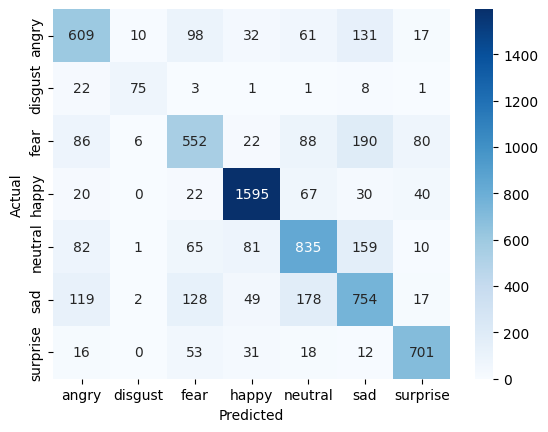

              precision    recall  f1-score   support

       angry       0.64      0.64      0.64       958
     disgust       0.80      0.68      0.73       111
        fear       0.60      0.54      0.57      1024
       happy       0.88      0.90      0.89      1774
     neutral       0.67      0.68      0.67      1233
         sad       0.59      0.60      0.60      1247
    surprise       0.81      0.84      0.83       831

    accuracy                           0.71      7178
   macro avg       0.71      0.70      0.70      7178
weighted avg       0.71      0.71      0.71      7178



In [1]:
#resnet34
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import timm
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

img_size = 224
epochs = 15
batch_size = 64
learning_rate = 0.0001

train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(root='data/train', transform=train_transform)
test_dataset = datasets.ImageFolder(root='data/test', transform=test_transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=len(train_dataset.classes))

model = models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

best_acc = 0.0

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(train_loader, unit="batch") as tepoch:
        for images, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            tepoch.set_postfix(loss=running_loss/total, accuracy=100. * correct/total)

    train_epoch_loss = running_loss / len(train_loader)
    train_epoch_acc = 100 * correct / total

    model.eval()
    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    y_true = []
    y_pred = []
    with torch.no_grad(), tqdm(test_loader, unit="batch") as tepoch:
        for images, labels in tepoch:
            tepoch.set_description("Test")
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            tepoch.set_postfix(loss=test_running_loss/test_total, accuracy=100. * test_correct/test_total)

    test_epoch_loss = test_running_loss / len(test_loader)
    test_epoch_acc = 100 * test_correct / test_total

    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Train Loss: {train_epoch_loss:.4f}, Train Accuracy: {train_epoch_acc:.2f}%, '
          f'Test Loss: {test_epoch_loss:.4f}, Test Accuracy: {test_epoch_acc:.2f}%')

    scheduler.step()

    if test_epoch_acc > best_acc:
        best_acc = test_epoch_acc
        torch.save(model.state_dict(), 'best_model.pth')

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_true, y_pred, target_names=train_dataset.classes))